In [1]:
# Mounting to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Changing directory to Session 7 project folder
% cd /content/gdrive/My Drive/TSAI-EVA-7.0/08_Advanced_Training_Concepts/

In [3]:
!pip install albumentations==0.4.6

     |████████████████████████████████| 117 kB 11.1 MB/s 
     |████████████████████████████████| 948 kB 40.8 MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-py3-none-any.whl size=65172 sha256=f7060d2d4e3b2670ae32ec54b254bb6d26b05d1fa6de39834773315171baed5c
  Stored in directory: /root/.cache/pip/wheels/cf/34/0f/cb2a5f93561a181a4bcc84847ad6aaceea8b5a3127469616cc
Successfully built albumentations
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [4]:
! pip install grad-cam

     |████████████████████████████████| 1.8 MB 11.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for grad-cam: filename=grad_cam-1.3.5-py3-none-any.whl size=22419 sha256=f5c0f5fe5a79fdf61751d626c6c3dc639b3b7d863000d7db646a598e6b416363
  Stored in directory: /root/.cache/pip/wheels/89/d1/a6/41cb46183c56fe9e78ba80781ca35c3bc2728406b694fb7a13
Successfully built grad-cam


In [5]:
import torch.optim as optim
import torch.nn as nn

# PyTorch_Vision 
Accessing the repository with modular main.py, utils.py and model files.

In [6]:
! git clone https://github.com/lavanyanemani96/PyTorch_Vision
% cd PyTorch_Vision/

Cloning into 'PyTorch_Vision'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 86 (delta 41), reused 69 (delta 24), pack-reused 0
Unpacking objects: 100% (86/86), done.
/content/gdrive/My Drive/EVA7/Session8/PyTorch_Vision


# Data

In [7]:
from main import * 

In [8]:
from utils import * 

In [9]:
Cifar10_train = dataset(A.Compose([ToTensorV2()]), True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [10]:
mu, sigma = mean_std_cifar10(Cifar10_train)

In [11]:
UnNorm = UnNormalize(mu, sigma) 

In [12]:
imgs = [item[0] for item in Cifar10_train] 
labels = [item[1] for item in Cifar10_train]

imgs = torch.stack(imgs, dim=0).numpy()

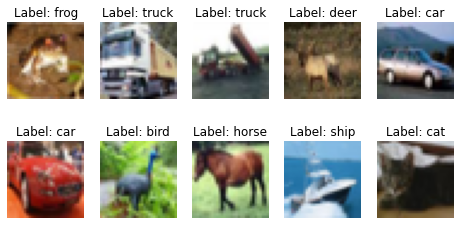

In [13]:
plot_grid(imgs, labels)

## Train/Test 

In [14]:
transforms_train = augmentation('Train', mu, sigma)
transforms_test = augmentation('Test', mu, sigma)

train_set = dataset(transforms_train, True)
test_set = dataset(transforms_test, False)

Files already downloaded and verified
Files already downloaded and verified


In [15]:
device, use_cuda = device()
batch_size = 128

In [16]:
train_loader = data_loader(train_set, args(batch_size, device, use_cuda)) 
test_loader = data_loader(test_set, args(batch_size, device, use_cuda))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


# ResNet

In [17]:
from models.resnet import ResNet18

In [18]:
model = ResNet18().to(device)

In [19]:
show_summary(model, device=device, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 36, 36]           1,728
       BatchNorm2d-2           [-1, 64, 36, 36]             128
            Conv2d-3           [-1, 64, 36, 36]          36,864
       BatchNorm2d-4           [-1, 64, 36, 36]             128
            Conv2d-5           [-1, 64, 36, 36]          36,864
       BatchNorm2d-6           [-1, 64, 36, 36]             128
        BasicBlock-7           [-1, 64, 36, 36]               0
            Conv2d-8           [-1, 64, 36, 36]          36,864
       BatchNorm2d-9           [-1, 64, 36, 36]             128
           Conv2d-10           [-1, 64, 36, 36]          36,864
      BatchNorm2d-11           [-1, 64, 36, 36]             128
       BasicBlock-12           [-1, 64, 36, 36]               0
           Conv2d-13          [-1, 128, 19, 19]          73,728
      BatchNorm2d-14          [-1, 128,

In [20]:
EPOCHS = 20
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.05, epochs=EPOCHS, steps_per_epoch=len(train_loader))

In [21]:
results = train_model(model, device, train_args(criterion, optimizer, scheduler), train_loader, test_loader, EPOCHS)

EPOCH: 0


  0%|          | 0/391 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Loss=1.4185359477996826 Batch_id=390 Accuracy=41.56: 100%|██████████| 391/391 [02:57<00:00,  2.20it/s]



Test set: Average loss: 0.0099, Accuracy: 5394/10000 (53.94%)

EPOCH: 1


Loss=1.1142866611480713 Batch_id=390 Accuracy=59.23: 100%|██████████| 391/391 [02:58<00:00,  2.19it/s]



Test set: Average loss: 0.0073, Accuracy: 6650/10000 (66.50%)

EPOCH: 2


Loss=0.7563246488571167 Batch_id=390 Accuracy=67.61: 100%|██████████| 391/391 [02:57<00:00,  2.20it/s]



Test set: Average loss: 0.0076, Accuracy: 6673/10000 (66.73%)

EPOCH: 3


Loss=0.9440091848373413 Batch_id=390 Accuracy=72.28: 100%|██████████| 391/391 [02:58<00:00,  2.20it/s]



Test set: Average loss: 0.0064, Accuracy: 7193/10000 (71.93%)

EPOCH: 4


Loss=0.6058961749076843 Batch_id=390 Accuracy=75.69: 100%|██████████| 391/391 [02:57<00:00,  2.20it/s]



Test set: Average loss: 0.0057, Accuracy: 7508/10000 (75.08%)

EPOCH: 5


Loss=0.4122799336910248 Batch_id=390 Accuracy=78.60: 100%|██████████| 391/391 [02:58<00:00,  2.20it/s]



Test set: Average loss: 0.0052, Accuracy: 7756/10000 (77.56%)

EPOCH: 6


Loss=0.41320332884788513 Batch_id=390 Accuracy=80.75: 100%|██████████| 391/391 [02:57<00:00,  2.20it/s]



Test set: Average loss: 0.0049, Accuracy: 7959/10000 (79.59%)

EPOCH: 7


Loss=0.4909684658050537 Batch_id=390 Accuracy=82.33: 100%|██████████| 391/391 [02:58<00:00,  2.19it/s]



Test set: Average loss: 0.0055, Accuracy: 7738/10000 (77.38%)

EPOCH: 8


Loss=0.5576585531234741 Batch_id=390 Accuracy=83.66: 100%|██████████| 391/391 [02:57<00:00,  2.20it/s]



Test set: Average loss: 0.0044, Accuracy: 8172/10000 (81.72%)

EPOCH: 9


Loss=0.34522733092308044 Batch_id=390 Accuracy=84.85: 100%|██████████| 391/391 [02:58<00:00,  2.19it/s]



Test set: Average loss: 0.0041, Accuracy: 8317/10000 (83.17%)

EPOCH: 10


Loss=0.3564205765724182 Batch_id=390 Accuracy=86.19: 100%|██████████| 391/391 [02:58<00:00,  2.19it/s]



Test set: Average loss: 0.0039, Accuracy: 8375/10000 (83.75%)

EPOCH: 11


Loss=0.2494029551744461 Batch_id=390 Accuracy=87.30: 100%|██████████| 391/391 [02:57<00:00,  2.20it/s]



Test set: Average loss: 0.0042, Accuracy: 8334/10000 (83.34%)

EPOCH: 12


Loss=0.4760161340236664 Batch_id=390 Accuracy=87.62: 100%|██████████| 391/391 [02:57<00:00,  2.20it/s]



Test set: Average loss: 0.0049, Accuracy: 8034/10000 (80.34%)

EPOCH: 13


Loss=0.3555682897567749 Batch_id=390 Accuracy=88.88: 100%|██████████| 391/391 [02:58<00:00,  2.19it/s]



Test set: Average loss: 0.0039, Accuracy: 8429/10000 (84.29%)

EPOCH: 14


Loss=0.46309715509414673 Batch_id=390 Accuracy=89.60: 100%|██████████| 391/391 [02:58<00:00,  2.19it/s]



Test set: Average loss: 0.0062, Accuracy: 7951/10000 (79.51%)

EPOCH: 15


Loss=0.4312002658843994 Batch_id=390 Accuracy=90.24: 100%|██████████| 391/391 [02:58<00:00,  2.19it/s]



Test set: Average loss: 0.0046, Accuracy: 8224/10000 (82.24%)

EPOCH: 16


Loss=0.2018948346376419 Batch_id=390 Accuracy=90.57: 100%|██████████| 391/391 [02:57<00:00,  2.20it/s]



Test set: Average loss: 0.0040, Accuracy: 8526/10000 (85.26%)

EPOCH: 17


Loss=0.28466489911079407 Batch_id=390 Accuracy=91.18: 100%|██████████| 391/391 [02:58<00:00,  2.20it/s]



Test set: Average loss: 0.0042, Accuracy: 8484/10000 (84.84%)

EPOCH: 18


Loss=0.23075179755687714 Batch_id=390 Accuracy=92.02: 100%|██████████| 391/391 [02:57<00:00,  2.20it/s]



Test set: Average loss: 0.0040, Accuracy: 8502/10000 (85.02%)

EPOCH: 19


Loss=0.1140967607498169 Batch_id=390 Accuracy=92.45: 100%|██████████| 391/391 [02:57<00:00,  2.20it/s]



Test set: Average loss: 0.0040, Accuracy: 8565/10000 (85.65%)



In [ ]:
% cd ../
! ls 

In [23]:
import pandas as pd

In [24]:
df = pd.DataFrame(results)
df.to_csv('results.csv', index=False, header=False)

In [25]:
torch.save(model.state_dict(), './saved_models/model_weights.pth')

# Loss/Accuracy Curves

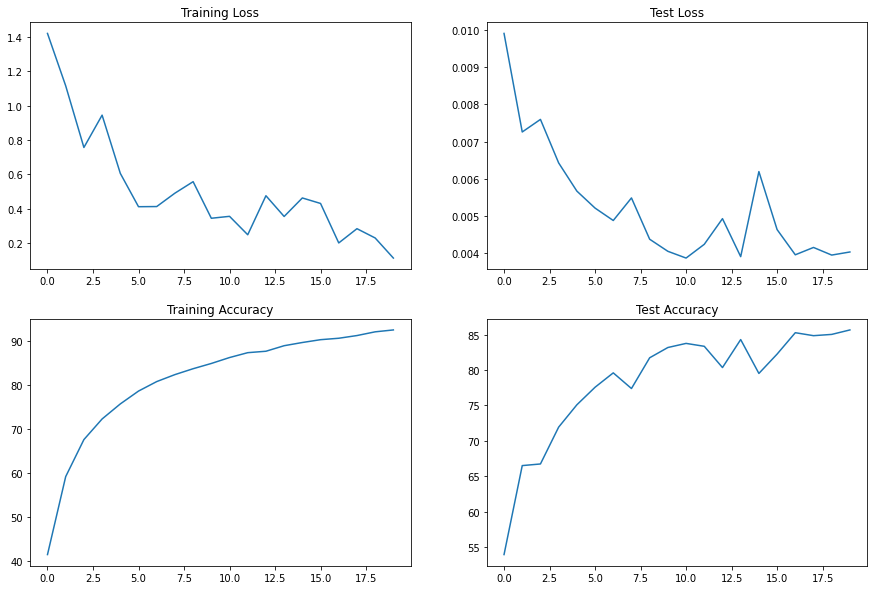

<Figure size 432x288 with 0 Axes>

In [26]:
plot_loss_accuracy(results)
plt.savefig('./plots/loss_accuracy.png')

# Predictions

In [27]:
n_images = 200

test_images = [item[0] for item in test_loader.dataset] 
test_images = torch.stack(test_images[:n_images])
test_targets = torch.tensor(test_loader.dataset.targets[:n_images]).to(device)
test_predictions = model(test_images.to(device))

In [28]:
correct = classfication_result(test_predictions, test_targets, device, b=True)
wrong = classfication_result(test_predictions, test_targets, device, b=False)

## Correct Classifications

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


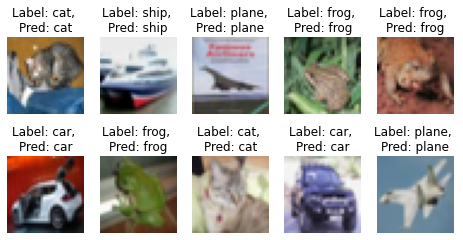

In [29]:
plot_grid(test_images[correct], test_targets[correct], UnNorm, test_predictions[correct])
plt.savefig('./plots/correct_classified.png')

## Wrong Classifications

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


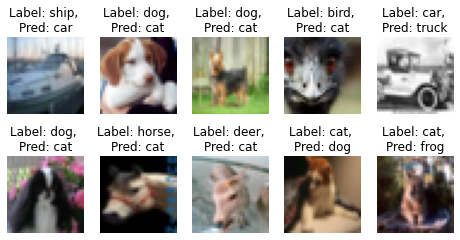

In [30]:
plot_grid(test_images[wrong], test_targets[wrong], UnNorm, test_predictions[wrong])
plt.savefig('./plots/misclassified.png')

# GradCam


In [31]:
cam = torch.from_numpy(grad_cam(model, use_cuda, test_images, test_targets))

## Correct Classifications GradCam 

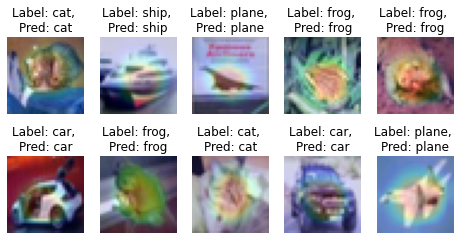

In [32]:
plot_grid_cam(test_images[correct], cam[correct], test_targets[correct], test_predictions[correct], UnNorm)
plt.savefig('./plots/correct_classified_gradcam.png')

## Wrong Classifications GradCam 

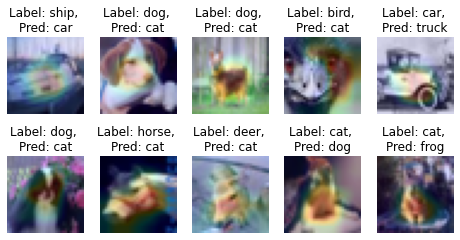

In [33]:
plot_grid_cam(test_images[wrong], cam[wrong], test_targets[wrong], test_predictions[wrong], UnNorm)
plt.savefig('./plots/misclassified_gradcam.png')